<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/KNN_Lab_6_3_170623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

# What is KNN
* K-Nearest Neighbors (KNN) is a machine learning algorithm for classification and regression tasks
* It predicts the class or value of a new data point based on its similarity to neighbouring data points
* KNN considers the K nearest neighbors to the new data point
* The algorithm calculates the majority class (classification) or average value (regression) among the K neighbours
* KNN assumes that similar data points tend to have similar outcomes
* It is a simple and intuitive algorithm with no explicit training phase
* K and the distance metric used are important parameters in KNN
* KNN can handle both numerical and categorical features
* It is sensitive to the choice of K and the distance metric, and the appropriate values need to be determined through experimentation
* KNN can be computationally expensive for large datasets as it requires calculating distances between data points

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.shape

(569, 33)

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# Check for nulls
df.isnull().sum()
# there is a value for every position in the DF

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
import pandas as pd
import seaborn as sns

# Sample 50 random samples from the DataFrame
sample_df = df.sample(n=50, random_state=42)

# Plot pairwise relationships using pairplot
sns.pairplot(sample_df)


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f685aeda200> (for post_execute):


KeyboardInterrupt: ignored

In [10]:
# Check datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
# Drop Unnamed: 32
df = df.drop('Unnamed: 32', axis=1)

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
(df['diagnosis'].value_counts(normalize=True) * 100)

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

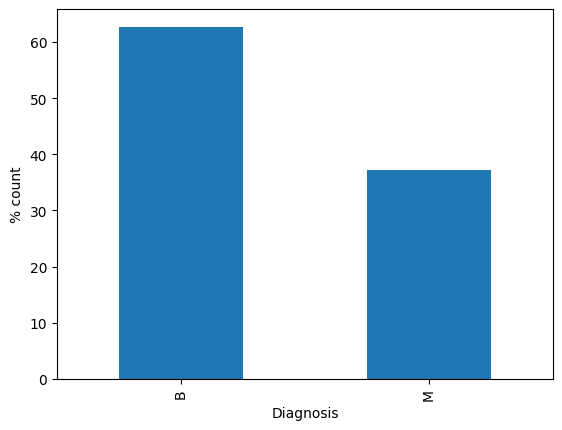

In [14]:
# Plot % of diagnosis values
(df['diagnosis'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.ylabel('% count')
plt.xlabel('Diagnosis')
plt.show()

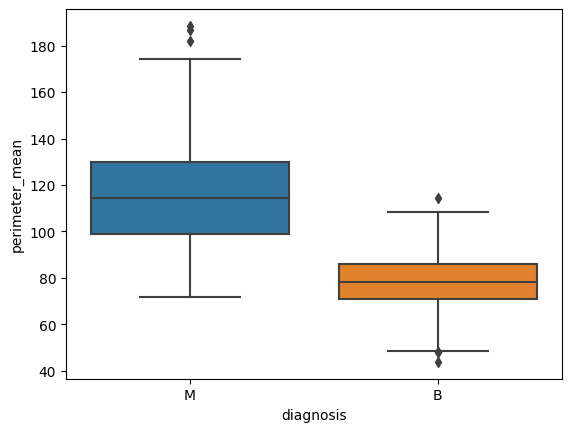

In [16]:
# Compare distribution of perimeter_mean between B and M groups

sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.show()

In [17]:
# Pair Plot
sns.pairplot(df)

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f365b6ee200> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f365b6ed480> (for post_execute):


KeyboardInterrupt: ignored

<ipython-input-18-7b02c0063758>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-18-7b02c0063758>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-18-7b02c0063758>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this wa

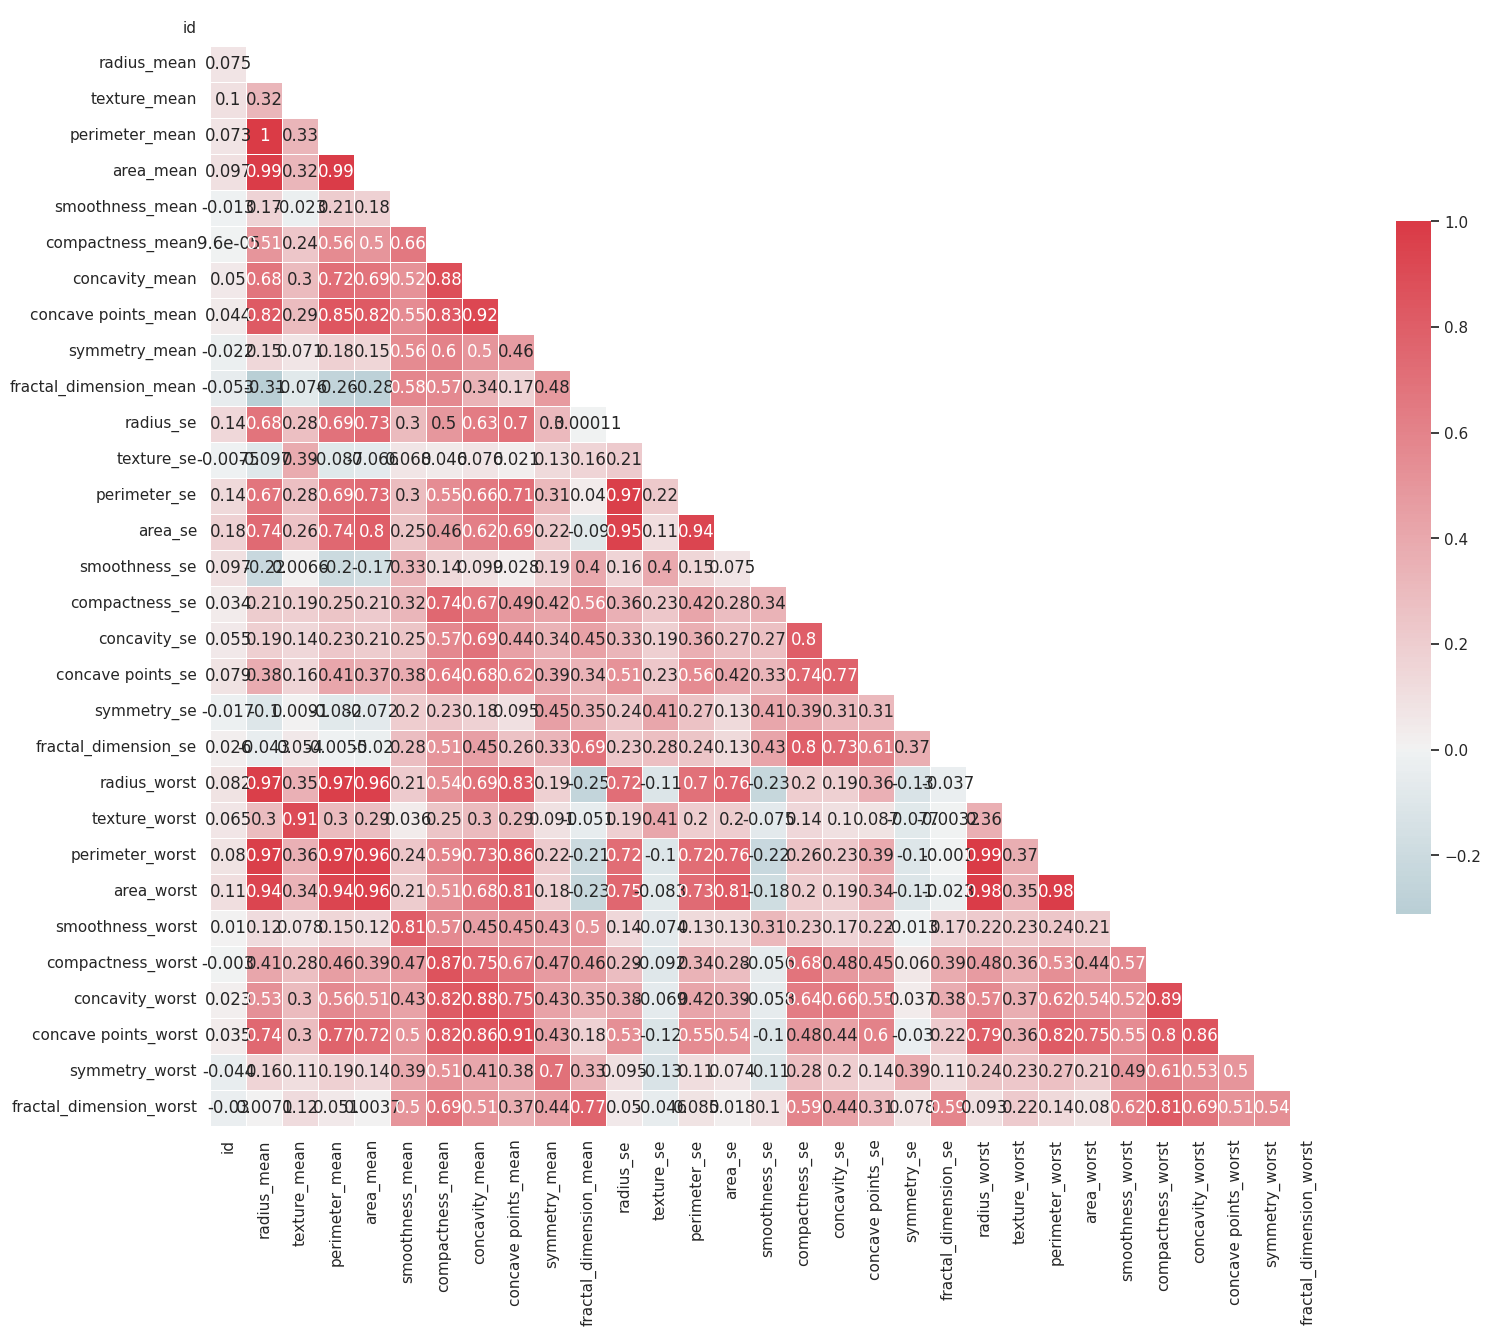

In [18]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [20]:
# Drop id
df = df.drop('id', axis=1)

<ipython-input-23-510bc337442a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-23-510bc337442a>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-23-510bc337442a>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this wa

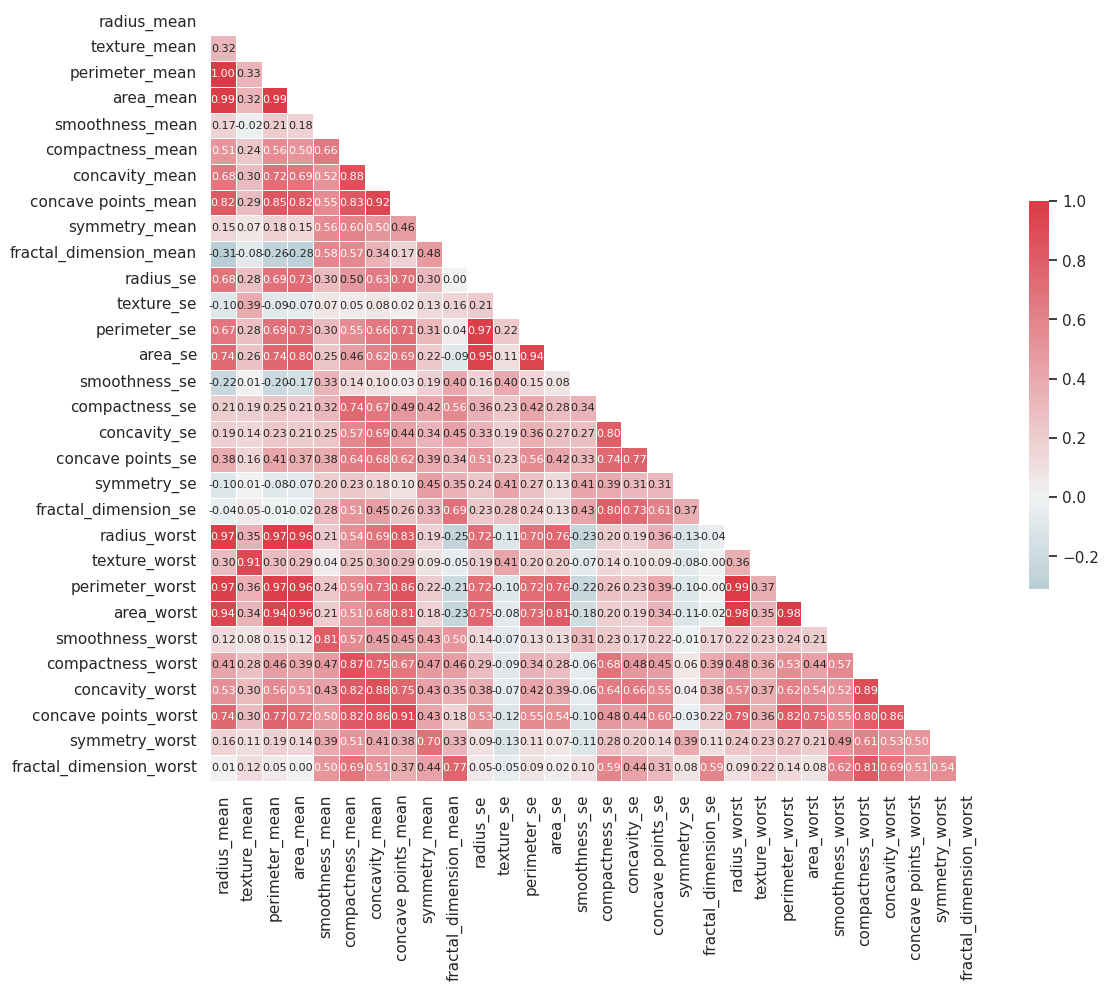

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".2f", annot_kws={"fontsize": 8})

plt.tight_layout()
plt.show()

### 4. What is the baseline accuracy?

In [28]:
# Get columns of that have 'mean' or 'diagnosis' in their names

mean_only_columns = []

for column in df.columns:
    if '_mean' in column or 'diagnosis' in column:
        mean_only_columns.append(column)

# List comprehension version:
# mean_only_columns = [c for c in breast_cancer.columns if not '_worst' in c and not '_se' in c]

print(mean_only_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [29]:
# Select mean_only_columns in breast cancer dataframe

selected_breast_cancer = df[mean_only_columns]
selected_breast_cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


<ipython-input-31-27a5877207ac>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-31-27a5877207ac>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-31-27a5877207ac>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

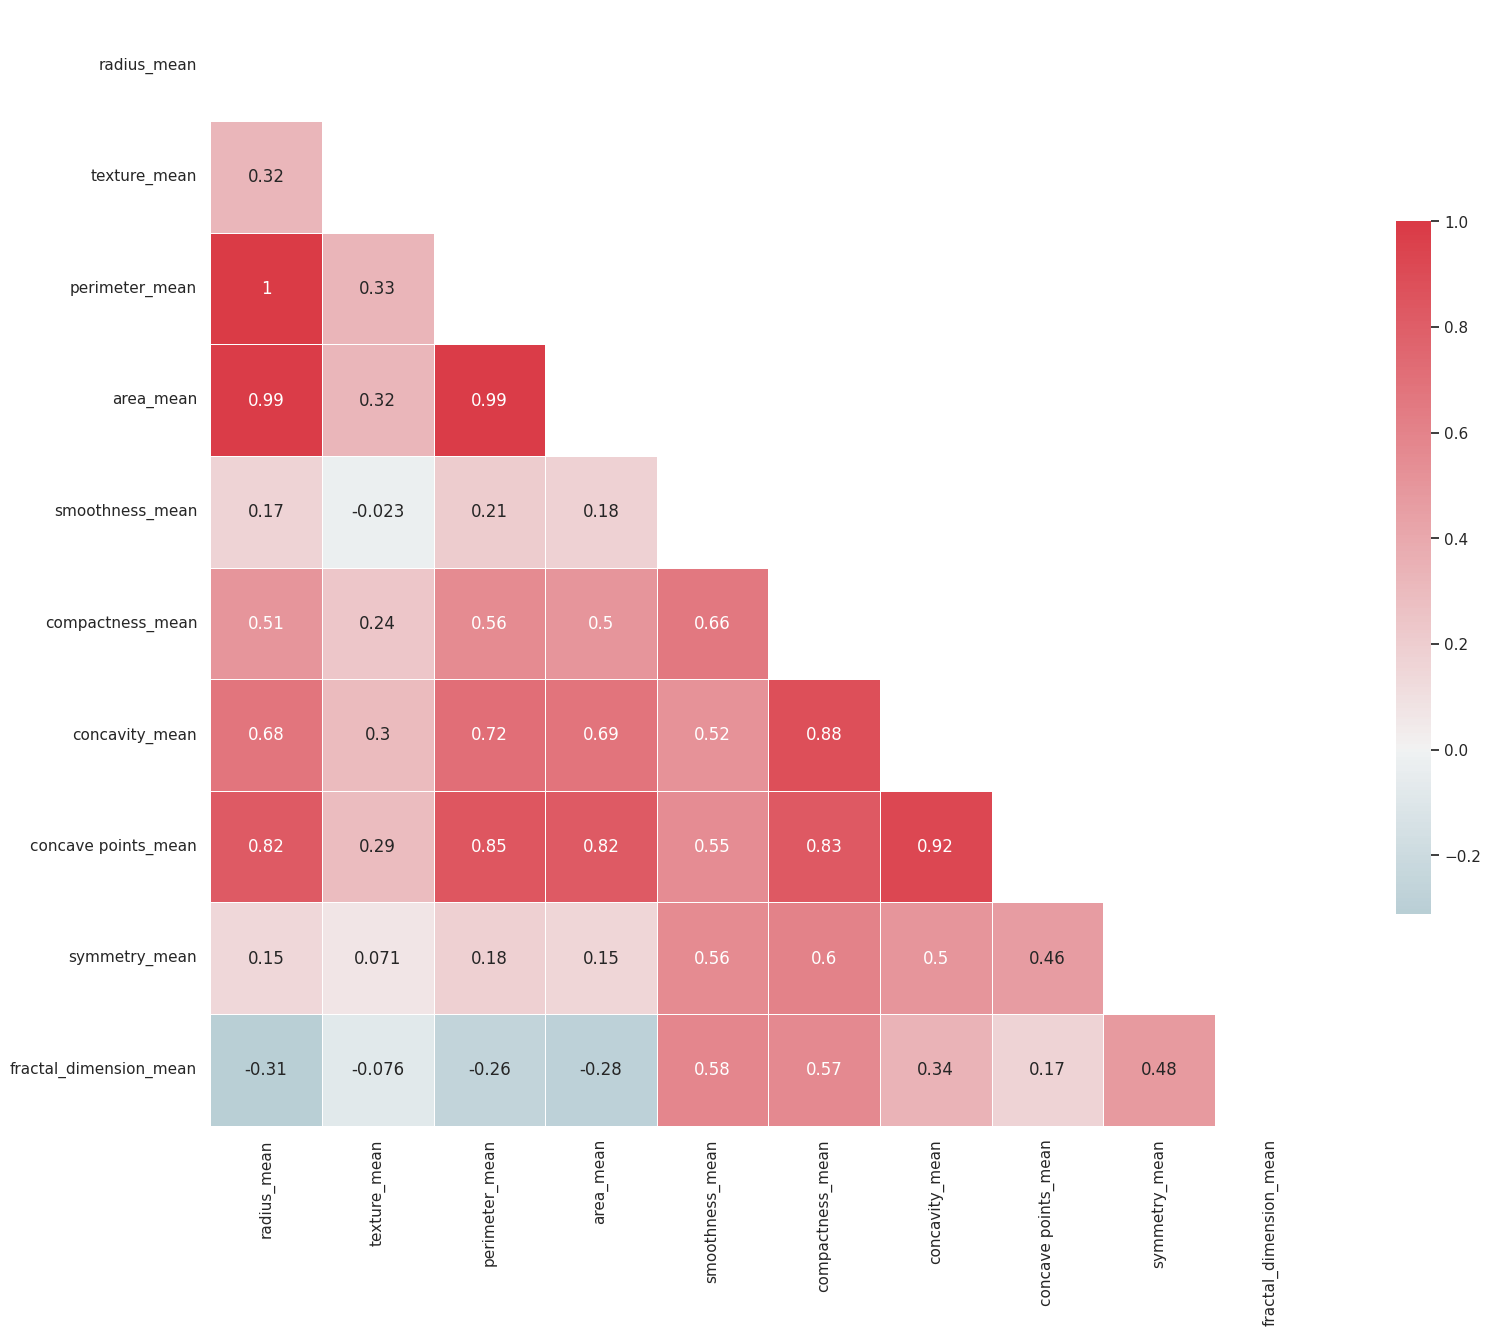

In [31]:
# Create a custom function that plots correlation in heatmap

def plot_corr_heatmap(df):

    # Copied code from seaborn examples
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(18, 18))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



plot_corr_heatmap(selected_breast_cancer)

In [32]:
def find_feature_correlations(df):

    """
    Find correlations between df features and convert to a format
    with one feature1 vs. feature2 correlation value per row

    _Params:_

    df: pandas DataFrame, features as columns. All datatypes must be numeric

    Returns a pandas DataFrame where a row contains one feature1 vs. feature2 correlation value
    """

    # initalise variable lists
    var1 = []
    var2 = []
    pearsons = []
    pvalues = []

    # iterate over generator for tuples of feature combination pairs
    for comb in combinations(df.columns.tolist(), 2):

        v1 = comb[0]
        var1.append(v1) # save feature 1 to list

        v2 = comb[1]
        var2.append(v2) # save feature 2 to list

        p, p_value = stats.pearsonr(df[v1], df[v2]) # get pearson correlation
        pearsons.append(p)
        pvalues.append(p_value)

    # Build dataframe of feature1 vs. feature2 pearson correlation
    corr_df = pd.DataFrame({'Feature1': var1,
                            'Feature2': var2,
                            'P': pearsons,
                            'p-value': pvalues})

    return corr_df

In [33]:
# Select diagnosis as target
y = selected_breast_cancer['diagnosis']

In [34]:
# What is the frequency of the most abundant class?

y.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [35]:
# ANSWER

# Choose features by column name
feature_columns = []
excluded_columns = ['diagnosis', 'area_mean', 'radius_mean', 'concavity_mean', 'compact_points_mean']

for column in selected_breast_cancer.columns:
    if column not in excluded_columns:
        feature_columns.append(column)

# list comprehension version:
# feature_columns = [c for c in selected_breast_cancer.columns if c not in excluded_columns]

# Filter for the feature columns
X = selected_breast_cancer[feature_columns]
X.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871
1,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667
2,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999
3,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744
4,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [36]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor

# fit on the unstandardized data:

from sklearn.neighbors import KNeighborsClassifier

# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [ ]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values

In [37]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [38]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9385964912280702


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [39]:
# Find rows in X_train
k = X_train.shape[0]

# Fit new KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

# What is the accuracy when k = number of rows?
print(metrics.accuracy_score(y_test, y_pred_class))

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [40]:
# ANSWER
# plot test accuracy by number of neighbors:

list(range(1, X_train.shape[0]+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [41]:
# Get accuracy of models with increasing number of neighbors
test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

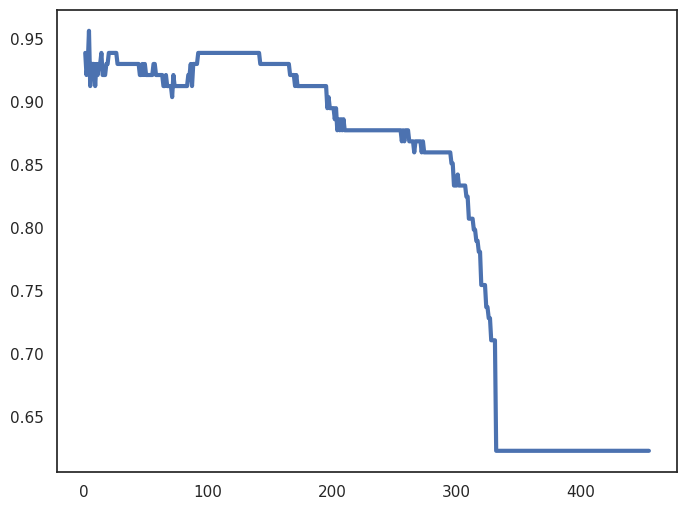

In [42]:
# plot test accuracy by number of neighbors:

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [44]:
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

# calculate test accuracy for model fitted with increasing number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

print(max(test_acc))

455.0
0.9068622884645242


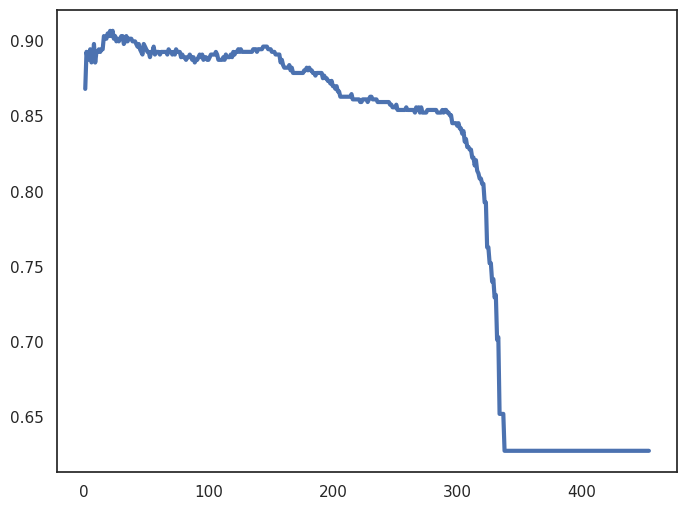

In [45]:
# Plot the accuracy vs. neighbours in KNN model

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [47]:
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

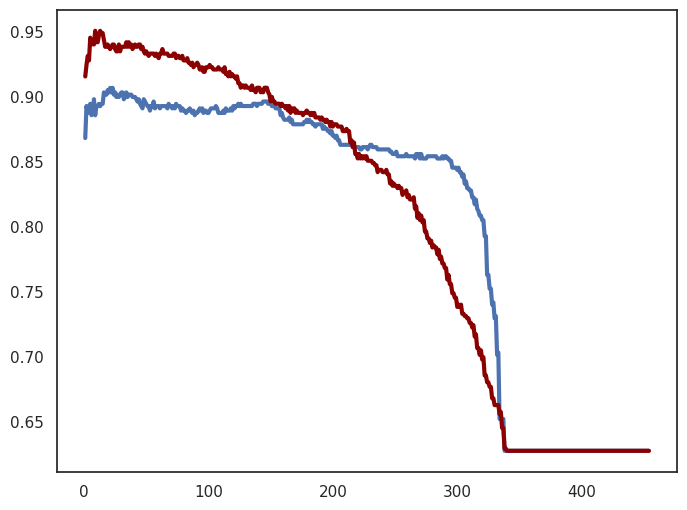

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



